# Índice de conteúdo


* [Introdução](#first-title)
* [Carregando bibliotecas e dataset](#second-title)
* [Data cleaning e verificando  a estrutura dos dados  ](#third-title)
    * [Duração](#third-first-title)
    * [Dias que as séries vão ao ar](#third-second-title)
* [Análise dos dados](#fourth-title)
    * [Analise Univariada](#fourth-first-title)
        * [Rating](#fourth-first-first-title)
        * [Content-Rating (Restrição de idade)](#fourth-first-second-title)
        * [Número de episódios](#fourth-first-third-title)
        * [Duração do episódio](#fourth-first-fourth-title)
        * [Dias que as séries vão ao ar](#fourth-first-fifth-title)
        * [Genero](#fourth-first-sixth-title)
    * [Analise Bivariada](#fourth-second-title)
        * [Content-Rating (Restrição de idade)](#fourth-second-first-title)
        * [Número de episódios](#fourth-second-second-title)
        * [Duração do episódio](#fourth-second-third-title)
        * [Dias que as séries vão ao ar](#fourth-second-fourth-title)
        * [Variáveis que influenciam a restrição de idade](#fourth-second-fifth-title)
            * [Quantos dias a série vai ao ar](#fourth-second-fifth-first-title)
            * [Número de episódios](#fourth-second-fifth-second-title)
            * [Duração do episódio](#fourth-second-fifth-third-title)
            * [Dias](#fourth-second-fifth-fourth-title)
                * [Money](#fourth-second-fifth-fourth-first-title)
                * [Hardcore](#fourth-second-fifth-fourth-second-title)
            * [Genero](#fourth-second-fifth-fifth-title)
                * [Money](#fourth-second-fifth-fifth-first-title)
                * [Hardcore](#fourth-second-fifth-fifth-second-title)
* [Conclusão](#fifth-title)
    * [Sobre o dataset](#fifth-first-title)
    * [Sobre os produtores](#fifth-second-title)
         * [Money](#fifth-second-first-title)
         * [Hardcore](#fifth-second-second-title)
    



# Introdução <a class="anchor" id="first-title"></a>

O Objetivo dessa análise é responder algumas questões relacionadas aos  250 dramas coreanos(kdrama) mais bem classificados segundo a <a href = "https://mydramalist.com"> MyDramaList </a>.


Para a mesma foi utilizado o dataset disponível no Kaggle.

Clique <a href  = "https://www.kaggle.com/datasets/ahbab911/top-250-korean-dramas-kdrama-dataset" >aqui</a> para acessá-lo.

Além de procurar as características mais comuns entre esses kdramas, vamos imaginar um cenário onde há dois produtores de kdrama, um apelidado "Hardcore"  e outro "Money", que querem se basear nos kdramas dessa lista para criar os seus próprios.

**Hardcore** tem como objetivo fazer um dos **melhores kdramas já vistos**, portanto, tenta obter uma pontuação altíssima.

**Money** por outro lado, tenta obter uma pontuação boa, mas seu objetivo é se basear em kdramas bons para **fazer um kdrama que venda bem.**


# Carregando bibliotecas e dataset <a class="anchor" id="second-title"></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt

pio.renderers.default = "svg"
pio.templates.default = "seaborn"
px.defaults.template = "seaborn"

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
comment_words = ''

data = pd.read_csv("kdrama.csv")
data.head(5)

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5


# Data cleaning e verificando  a estrutura dos dados   <a class="anchor" id="third-title"></a>
 

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  250 non-null    object 
 1   Aired Date            250 non-null    object 
 2   Year of release       250 non-null    int64  
 3   Original Network      250 non-null    object 
 4   Aired On              250 non-null    object 
 5   Number of Episodes    250 non-null    int64  
 6   Duration              250 non-null    object 
 7   Content Rating        245 non-null    object 
 8   Rating                250 non-null    float64
 9   Synopsis              250 non-null    object 
 10  Genre                 250 non-null    object 
 11  Tags                  250 non-null    object 
 12  Director              249 non-null    object 
 13  Screenwriter          249 non-null    object 
 14  Cast                  250 non-null    object 
 15  Production companies  2


Apesar do baixo número de nulls, uma coisa que pode  atrapalhar a análise é o fato dos nomes das colunas estarem com espaço. Vou trocar os espaços por underlines (_) e deixar tudo em minusculo para facilitar mais para frente.


In [3]:
# Criando novo dataframe para não modificar o antigo caso queiramos fazer outra coisa (NC = New Col Name)

dataNCN = data.copy()
dataNCN.columns = [c.lower().replace(' ', '_') for c in dataNCN.columns]
dataNCN.columns

Index(['name', 'aired_date', 'year_of_release', 'original_network', 'aired_on',
       'number_of_episodes', 'duration', 'content_rating', 'rating',
       'synopsis', 'genre', 'tags', 'director', 'screenwriter', 'cast',
       'production_companies', 'rank'],
      dtype='object')

Agora vamos verificar em quais linhas estão os nulls:

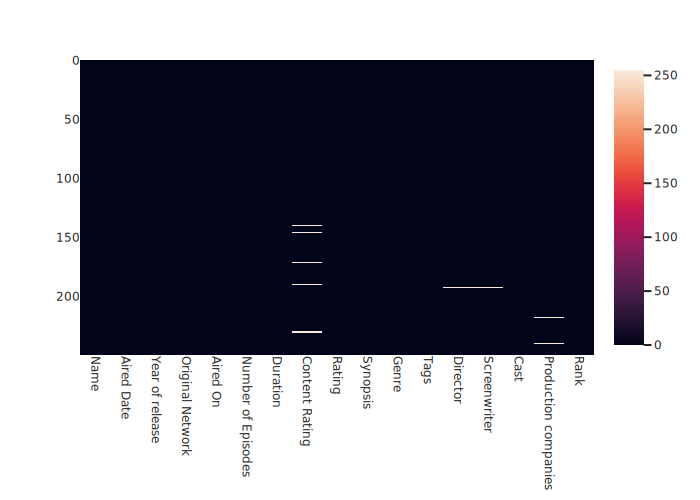

In [4]:
# Heatmap com os nulls
heatmapnull = px.imshow(data.isnull())
heatmapnull.update_xaxes(tickangle = 90)
heatmapnull.show()

In [5]:
# Nome dos dramas  que não tem content rating

dataNCN[pd.isnull(dataNCN.content_rating)].name


140       One Dollar Lawyer
146                    Duel
171                  Player
190    The Mysterious Class
230               Liar Game
Name: name, dtype: object

In [6]:
# Nome dos dramas que não tem diretor e screenwriter (no gráfico da pra ver que é apenas 1)
dataNCN[pd.isnull(dataNCN.director)].name


192    It's Okay, That's Friendship
Name: name, dtype: object

In [7]:
# Nome dos dramas que não tem a empresa que production

dataNCN[pd.isnull(dataNCN.production_companies)].name



218        Angry Mom
240    Coffee Prince
Name: name, dtype: object

Tentei procurar para completar os missings, mas não achei os dados correspondentes.

## Duração <a class="anchor" id="third-first-title"></a>

In [8]:
arrayDuration =  dataNCN.duration.unique().tolist()

Podemos ver que os valores estão em string, além de alguns estarem em horas misturados com minutos. Vamos transformar todos em int em minutos.

In [9]:
#Usar [:] Se não o python não copia e sim faz uma referencia ao objeto.
arrayDurationNew = arrayDuration[:]
#loopando pela lista
for ind, dur in enumerate(arrayDurationNew):
    num1, num2 = 0, 0
    current = dur.split(sep = " ")
    if "hr." in current:
        num1 = int(current[current.index("hr.") - 1]) * 60
    num2 = int(current[current.index("min.") - 1])
    arrayDurationNew[ind] = num1 + num2

In [10]:
dataNCN2 = dataNCN.replace(arrayDuration,arrayDurationNew).copy()

## Dias que as séries vão ao ar <a class="anchor" id="third-second-title"></a>


In [11]:
dataNCN2.aired_on.unique()

array(['Friday', ' Wednesday, Thursday', 'Thursday', ' Friday, Saturday',
       'Saturday, Sunday', 'Wednesday, Thursday', ' Saturday, Sunday',
       ' Sunday, Saturday', ' Monday, Tuesday', 'Friday, Saturday',
       'Monday, Tuesday', 'Saturday', 'Tuesday',
       'Monday, Tuesday, Wednesday', 'Wednesday', 'Monday, Thursday',
       'Sunday', 'Monday, Tuesday, Wednesday, Thursday, Friday',
       'Thursday, Wednesday', 'Tuesday, Thursday', 'Wednesday, Saturday'],
      dtype=object)

Pode-se observar que o número de vezes que uma série ao ar em conjunto com os dias variam muito.

Por isso, vou utilizar o número de vezes que a série vai ao ar para tentar estabelecer uma relação com a avaliação, e não especificamente que dias ela vão ao ar. Depois, podemos ver quais dias são mais frequentes.

In [12]:
dataNCN2["days_aired_on"] = dataNCN2["aired_on"].transform(lambda x: (x.count(",") + 1))
dataNCN2['days_aired_on']= dataNCN2['days_aired_on'].astype('category')

# Análise dos dados <a class="anchor" id="fourth-title"></a>
Daqui para frente que as coisas ficam interessantes para **Hardcore** e **Money**.

Primeiro, vamos analisar as variaveis sozinhas( analise univariada) para depois ver as correlações entre elas ( analise bivariada). Vamos ver quais valores são mais frequentes e se a relação entre elas nos permite inferir alguma coisa. Com essas informações, vamos tentar criar filtros para indicar para **Hardcore** e **Money**, quais são os melhores parametros para seus objetivos.

Para essa análise utilizaremos:

- Rating
- Content Rating (Restrição de idade)
- Número de episódios
- Duração do episódio
- Numero e Dias que as séries vão ao ar
- Genero

## Analise Univariada <a class="anchor" id="fourth-first-title"></a>

### Rating  <a class="anchor" id="fourth-first-first-title"></a>

Vamos observar as tendências da classificação.

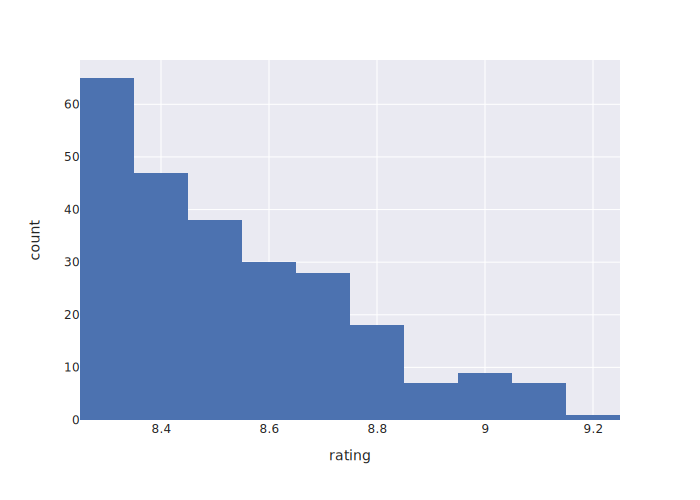

In [13]:
px.histogram(dataNCN2, x = "rating")

In [14]:
# medidas de têndecia central de rating
dataNCN2.rating.describe()

count    250.000000
mean       8.534000
std        0.221359
min        8.300000
25%        8.300000
50%        8.500000
75%        8.700000
max        9.200000
Name: rating, dtype: float64

Como podemos observar uma distribuição assimétrica a direita, a mediana é a medida de têndecia central mais recomendado.

Assim, podemos observar que a mediana entre esses dramas é 8.5.

Para **Hardcore**, vamos adotar que ele precisa pelo menos ser **melhor do que a mediana** geral visando estar **acima dos 75%**, enquanto para **Money**  só  precisa **estar entre os 25 a 75% melhores ratings**

Vamos fazer um esquema com cada variavel para cada produtor para termos um acompanhamento durante a análise:

**Money**:
- **Rating**: Pelo menos 8.3
- **Restrição de idade:** 
- **Número de episódios:**
- **Duração do episódio:**
- **N° de Dias:**
- **Dias**
- **Genero**

**Hardcore**:
- **Rating**:  Pelo menos  acima 8.5, preferencialmente 8.7
- **Restrição de idade:**
- **Número de episódios:**
- **Duração do episódio:**
- **N° de Dias:**
- **Dias**
- **Genero**

### Content rating ( Restrição de Idade) <a class="anchor" id="fourth-first-second-title"></a>

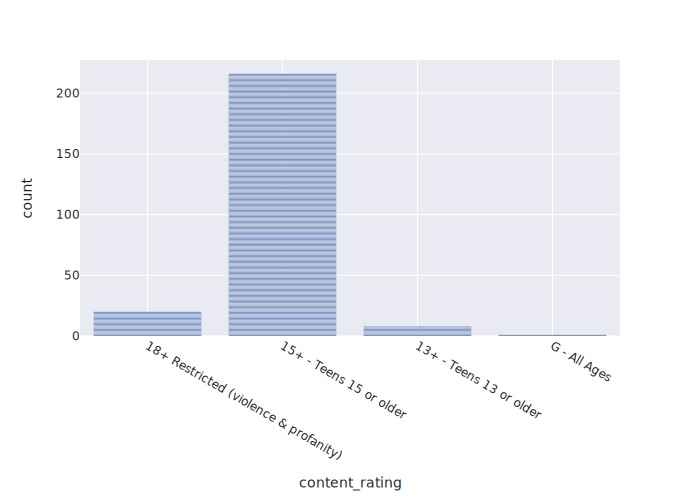

In [15]:
px.bar(dataNCN2, x = "content_rating")

Podemos observar por enquanto que:

- Dentro os top 250, a categoria que mais aparece com relação a restrição de idade é 15+,em seguida de 18+ e 13+.

Assim diante do contexto de nossos produtores, podemos pensar que  para **Money**  a melhor restrição de idade até agora é 15+ , enquanto **Hardcore** pode escolher tanto 15+, 18+ ou 13+. Talvez 18+ seja preferivel para **Hardcore** por ter uma maior liberdade quanto ao conteúdo, porém por enquanto vamos deixar as 3 opções em aberto.


**Money**:
- **Rating**: Pelo menos 8.3
- **Restrição de idade:** 15+
- **Número de episódios:**
- **Duração do episódio:**
- **N° de Dias:**
- **Dias**
- **Genero**

**Hardcore**:
- **Rating**: Pelo menos  acima 8.5, preferencialmente 8.7
- **Restrição de idade:** 15+, 18+ ou 13+
- **Número de episódios:**
- **Duração do episódio:**
- **N° de Dias:**
- **Dias**
- **Genero**

### Número de episódios <a class="anchor" id="fourth-first-third-title"></a>

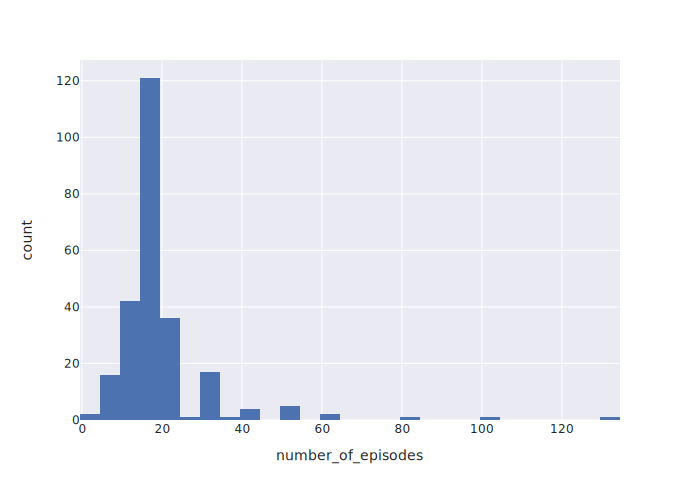

In [16]:
px.histogram(dataNCN2, x = "number_of_episodes")

In [17]:
dataNCN2.number_of_episodes.describe()

count    250.000000
mean      19.064000
std       13.245743
min        1.000000
25%       16.000000
50%       16.000000
75%       20.000000
max      133.000000
Name: number_of_episodes, dtype: float64

Podemos observar que um drama médio possui algum em torno de 16 episódios(mediana, pois a distribuição é assimétrica para direita).

Vamos precisar dessa váriavel mais pra frente como categórica( Spoiler), portanto vou transformar ela em 3 categorias seguindo as porcentagens(como a 25 e 50 são iguais não da para transformar em 4)

In [18]:
condicoes = [(dataNCN2["number_of_episodes"] < 16),
             ((dataNCN2["number_of_episodes"] >= 16) & (dataNCN2["number_of_episodes"] < 20)), 
             (dataNCN2["number_of_episodes"] >=20 ) ]
classificacao = ["<16", ">=16 e <20", '>=20']
dataNCN2["number_of_episodes_category"] = np.select(condicoes,classificacao, default = np.nan)

Voltando para o contexto dos nossos produtores, para **Money** é de se imaginar que, ele quer se **manter próximo do mais comum**, mas **quer economizar o maximo de dinheiro possível**, portanto, seria melhor fazer menos episódios. Assim, o melhor número de episódios para ele seria **algo em torno de 16**.

Já para **Hardcore** essa informação sozinha não diz nada, então vamos só assumir que ele vai seguir o mais frequente por enquanto.

**Money**:
- **Rating**: Pelo menos 8.3
- **Restrição de idade:** 15+
- **Número de episódios:** 16
- **Duração do episódio:**
- **N° de Dias:**
- **Dias**
- **Genero**

**Hardcore**:
- **Rating**: Pelo menos  acima 8.5, preferencialmente 8.7
- **Restrição de idade:** 15+, 18+ ou 13+
- **Número de episódios:** entre 16 e 20
- **Duração do episódio:**
- **N° de Dias:**
- **Dias**
- **Genero**

### Duração do episódio <a class="anchor" id="fourth-first-fourth-title"></a>

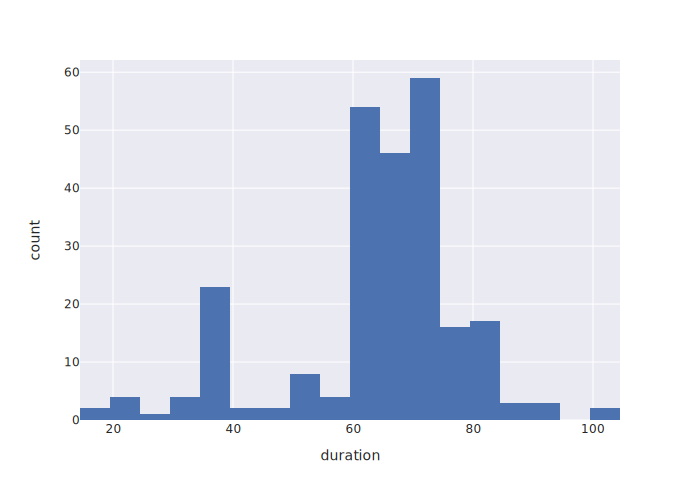

In [19]:
px.histogram(dataNCN2, x = "duration")

In [20]:
dataNCN2.duration.describe()

count    250.000000
mean      62.408000
std       14.957018
min       15.000000
25%       60.000000
50%       65.000000
75%       70.000000
max      100.000000
Name: duration, dtype: float64

De novo, vamos precisar dessa váriavel mais pra frente como categórica( Spoiler), portanto vou transformar ela em 4 categorias seguindo as porcentagens

In [22]:
condicoes = [(dataNCN2["duration"] < 60), 
             ((dataNCN2["duration"] >= 60) &(dataNCN2["duration"] < 65)), 
            ((dataNCN2["duration"] >= 65) & (dataNCN2["duration"] < 70)), 
             (dataNCN2["duration"] >=70 ) ]
classificacao = ["<60", ">=60 e <65", ">=65 e <70", '>=70']
dataNCN2["duration_category"] = np.select(condicoes,classificacao, default = np.nan)

Com relação aos produtores vamos seguir as mesmas ideias do que adotamos nos número de episódios por enquanto
**Money**:
- **Rating**: Pelo menos 8.3
- **Restrição de idade:** 15+
- **Número de episódios:** 16
- **Duração do episódio:** 60 
- **N° de Dias:**
- **Dias**
- **Genero**

**Hardcore**:
- **Rating**: Pelo menos  acima 8.5, preferencialmente 8.7
- **Restrição de idade:** 15+, 18+ ou 13+
- **Número de episódios:** entre 16 e 20
- **Duração do episódio:** entre 60 e 70
- **N° de Dias:**
- **Dias**
- **Genero**

### Dias que as séries vão ao ar  <a class="anchor" id="fourth-first-fifth-title"></a>

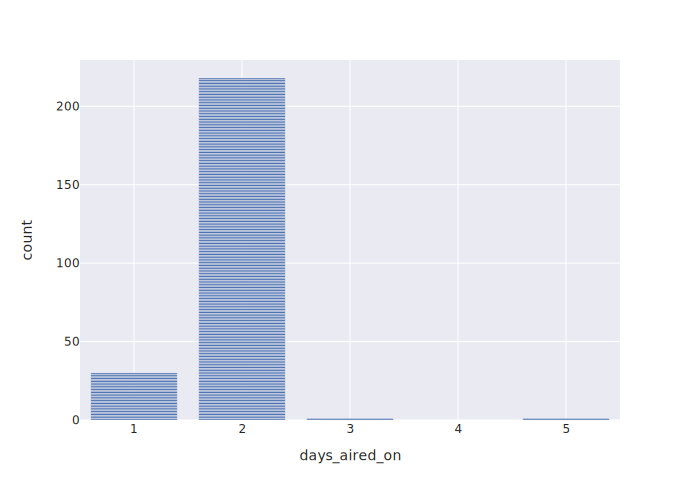

In [23]:
px.bar(dataNCN2, x = "days_aired_on")

Nesse caso, vemos que as séries vão ao ar em sua maioria 2 vezes por semana ou 1. Como vimos na parte de estrutura de dados, é muito dificil ver quais dias especificamente são mais comuns, portanto adotei essa medida.

Para nossos produtores, **Money** irá adotar 2 vezes por semana por ser mais comum enquanto **Hardcore** ficará com 2 vezes por semana ou 1 vez, já que as outras frequência acabam sendo muito pouco frequentes,e portanto, arriscadas até demais.

**Money**:
- **Rating**: Pelo menos 8.3
- **Restrição de idade:** 15+
- **Número de episódios:** 16 episódios
- **Duração do episódio:** 60 minutos
- **N° de Dias:** 2 vezes por semana
- **Dias**
- **Genero**

**Hardcore**:
- **Rating**:  Pelo menos  acima 8.5, preferencialmente 8.7
- **Restrição de idade:** 15+, 18+ ou 13+
- **Número de episódios:** entre 16 e 20 episódios
- **Duração do episódio:** entre 60 e 70 minutos
- **N° de Dias:** 1 ou 2 vezes por semana
- **Dias**
- **Genero**

Em seguida veremos qual dias são mais comuns.

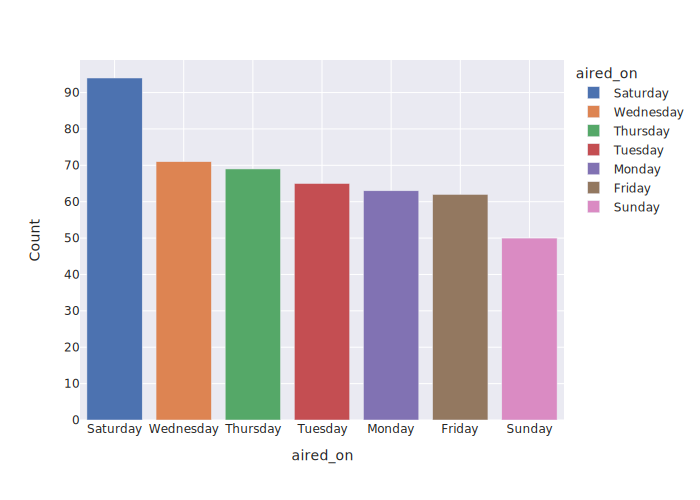

In [25]:
def countSM(df, column):
    SM_values = df[column].values.astype('U') # converter para array numpy de strings
    SM_list = np.char.split(np.char.replace(SM_values, ',', ''), ' ') # remover vírgulas e dividir por espaços
    SM_flat = np.hstack(SM_list) # converter em um array 1D
    SM_count = np.unique(SM_flat, return_counts=True) # contar ocorrências de cada elemento único
    count = pd.DataFrame({column : SM_count[0], 'Count': SM_count[1]}) # converter para DataFrame pandas
    count = count[count[column] != ""].copy() #Retirando a coluna com o valor ""
    return count.sort_values('Count', ascending=False) #Retornando o dataframe ordenado
days_count = countSM(dataNCN2, "aired_on")
px.bar(days_count, x = "aired_on", y = "Count", color = "aired_on")

Apesar de não ser a estatística mais confiavel, faz muito sentido sábado ser o dia mais comum( Pessoas não estão ocupadas e no dia seguinte não é um dia de trabalho) . Por enquanto, para ambos os produtores, vamos ficar com os dias mais frequentes.

**Money**:
- **Rating**:  Pelo menos 8.3
- **Restrição de idade:** 15+
- **Número de episódios:** 16 episódios
- **Duração do episódio:** 60 minutos
- **N° de Dias:** 2 vezes por semana
- **Dias**: Sábado e Quarta
- **Genero**

**Hardcore**:
- **Rating**: Pelo menos  acima 8.5, preferencialmente 8.7
- **Restrição de idade:** 15+, 18+ ou 13+
- **Número de episódios:** entre 16 e 20 episódios
- **Duração do episódio:** entre 60 e 70 minutos
- **N° de Dias:** 1 ou 2 vezes por semana
- **Dias**: Sábado e(se duas vezes por semana) Quarta
- **Genero**


### Genero  <a class="anchor" id="fourth-first-sixth-title"></a>

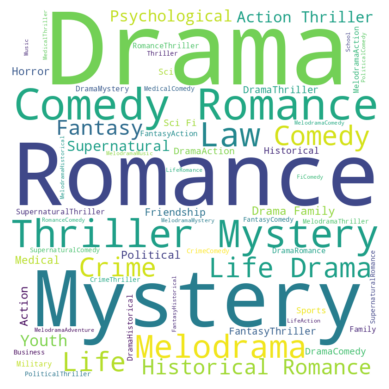

In [26]:
final = ""
for name, values in dataNCN2.genre.items():
    #Dividindo as string em listas para poder contar
    temp = values.split(",")
    temp = "".join(temp).split(" ")
    final += " ".join(temp)
genre_word_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,
                            stopwords= stopwords).generate(final)
genre_word_cloud
plt.figure()
plt.imshow(genre_word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()


A WorlCloud nos da uma noção dos generos mais comuns porém a algumas imprecisões, então vamos plotar os 10 generos mais comuns.

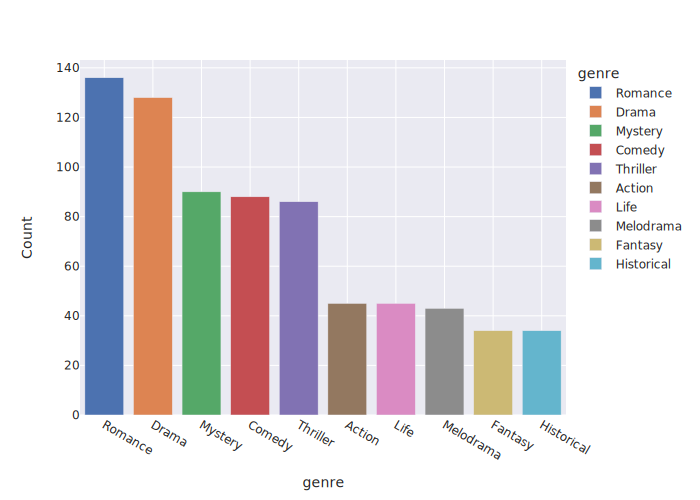

In [27]:
genre_count = countSM(dataNCN2, "genre")
px.bar(genre_count.iloc[0:10,:], x = "genre", y = "Count", color = "genre")

Não é atoa que kdramas tem a fama de serem melodramaticos... Romance e drama são os genêros mais comuns no top 250 dessa séries

Para **Money** essa informação é perfeita!! Escolhendo algum dos generos no top 5 ou até mesmo sendo apenas romance e drama para ele já está ótimo. Para **Hardcore** porém, já é uma escolha mais dificil. Ele deve escolher um genero que é mais comum, ou seja, mais cliche, ou apostar em algo mais diferente? Vamos deixar em aberto essa parte para **Hardcore**.

**Money**:
- **Rating**: Pelo menos 8.3
- **Restrição de idade:** 15+
- **Número de episódios:** 16 episódios
- **Duração do episódio:** 60 minutos
- **N° de Dias:** 2 vezes por semana
- **Dias**: Sábado e Quarta
- **Genero**: Escolher algo do top 5, Romance ou Drama são boas escolhas.

**Hardcore**: 
- **Rating**: Pelo menos  acima 8.5, preferencialmente 8.7
- **Restrição de idade:** 15+, 18+ ou 13+
- **Número de episódios:** entre 16 e 20 episódios
- **Duração do episódio:** entre 60 e 70 minutos
- **N° de Dias:** 1 ou 2 vezes por semana
- **Dias**: Sábado e(se duas vezes) Quarta
- **Genero**:


## Ánalise Bivariada  <a class="anchor" id="fourth-second-title"></a>


Agora as coisas ficam  mais interessantes,
vamos tentar analisar quais são os fatores que influenciam em um maior rating e verificar se nossas escolhas foram boas.

### Content Rating  <a class="anchor" id="fourth-second-first-title"></a>

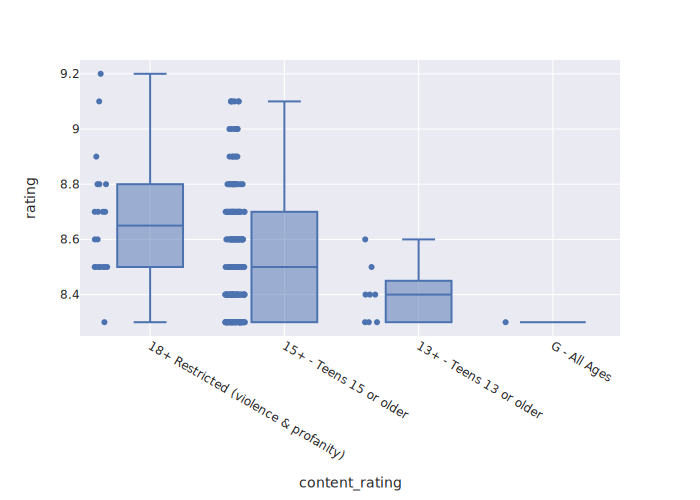

In [28]:
px.box(dataNCN2, x = "content_rating", y = "rating", points = "all")

Interessantemente, quanto maior a restrição de idade maior a mediana dos ratings rating! Parece que com uma maior liberdade sobre o conteúdo pode levar ao um maior rating ou talvez, aqueles que assistam conteúdos com com uma maior restrição de idade dem avaliações melhores.

Uma coisa a se questionar porém,ao olharmos os pontos no gráfico, é se isso não é advindo das diferentes representações no dataset de cada content rating(principalmente em relação ao G que possui apenas 1 observação.)

Porém, com esses dados mantemos e confirmamos que para  **Money** é melhor uma restrição de idade de 15+ e agora restringimos a restrição de idade de **Hardcore** para provavelmente 18+, pois é a quem tem a maior mediana e a maior nota
**Money**:
- **Rating**: Pelo menos 8.3
- **Restrição de idade:** 15+
- **Número de episódios:** 16 episódios
- **Duração do episódio:** 60 minutos
- **N° de Dias:** 2 vezes por semana
- **Dias**: Sábado e Quarta
- **Genero**: Escolher algo do top 5, Romance ou Drama são boas escolhas.

**Hardcore**: 
- **Rating**: Pelo menos  acima 8.5, preferencialmente 8.7
- **Restrição de idade:** 18+
- **Número de episódios:** entre 16 e 20 episódios
- **Duração do episódio:** entre 60 e 70 minutos
- **N° de Dias:** 1 ou 2 vezes por semana
- **Dias**: Sábado e(se duas vezes) Quarta
- **Genero**:


### Número de episódios <a class="anchor" id="fourth-second-second-title"></a>

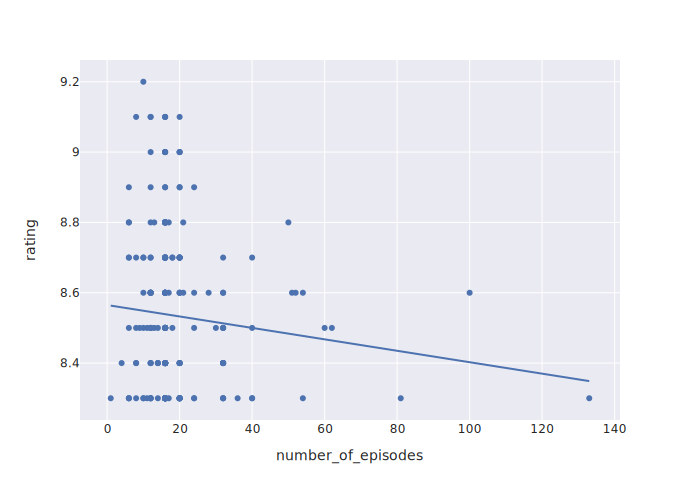

In [29]:
px.scatter(dataNCN2, x ="number_of_episodes", y = "rating", trendline = "ols")

In [30]:
dataNCN2.rating.corr(dataNCN2.number_of_episodes)

-0.09730915471484626

Podemos observar que há uma correlação muito fraca(ou quase nula) entre o número de episódios e a avalição desses dramas. De novo, não podemos tirar nada desse gráfico para que possamos ajudar nossos produtores.

### Duração  <a class="anchor" id="fourth-second-third-title"></a>

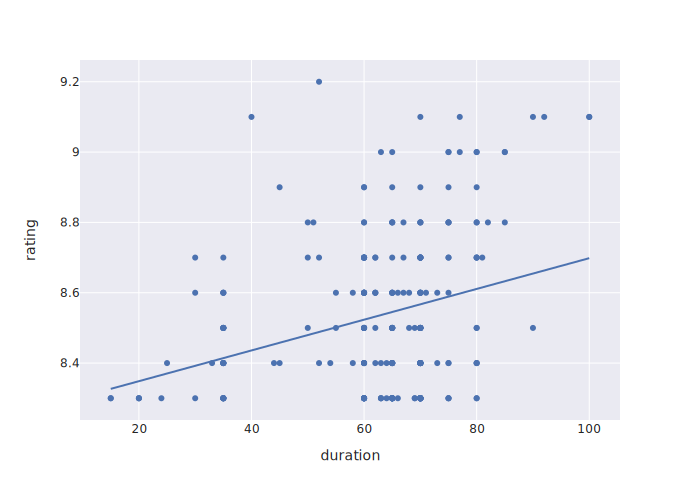

In [31]:
px.scatter(dataNCN2, x = "duration", y = "rating", trendline = "ols")

In [32]:
dataNCN2.rating.corr(dataNCN2.duration)

0.29540213773622925

Houve uma correlação fraca entre as duas as duas váriaveis, portanto, nada que possamos usar para nossos produtores.

### Dias que as séries vão ao ar <a class="anchor" id="fourth-second-fourth-title"></a>

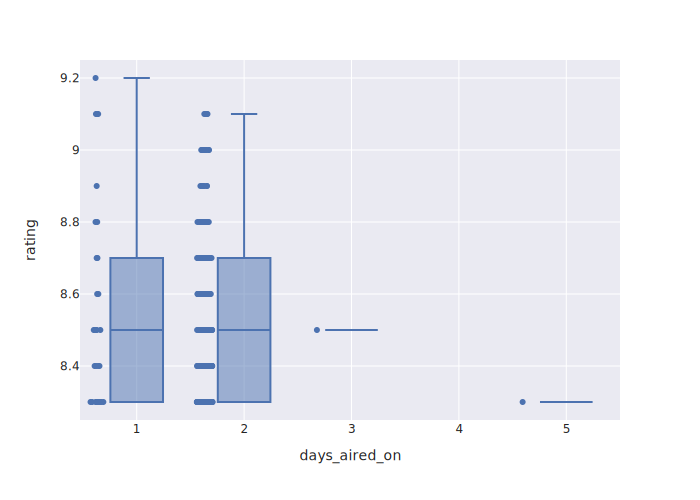

In [33]:
px.box(dataNCN2, x = "days_aired_on", y ="rating", points = "all" )

Podemos ver que aparentemente não há nenhuma quase correlação entre as variáveis, o que mais uma vez complica a vida de nossos produtores que não tem mais informações para tomar decisões.


Já que só achamos que possivelmente a variável restrição de idade parece afetar o rating, vamos tentar achar a relação das outras váriaveis com a mesma, assim podemos tentar melhorar o que já temos.

### Variáveis que influenciam a restrição de idade <a class="anchor" id="fourth-second-fifth-title"></a>

Vamos tentar para todas as variveis que analisamos, primeiro verificar sua correlação com a restrição de idade, para depois ver tudo isso combinado com o rating.

#### Quantos dias a série vai ao ar  <a class="anchor" id="fourth-second-fifth-first-title"></a>

In [34]:
days_aired_on_tab = dataNCN2.groupby(["days_aired_on","content_rating"]).size().reset_index()
days_aired_on_tab["porcentagem"] = dataNCN2.groupby(['days_aired_on','content_rating']).size().groupby(level=0).apply(lambda 
        x:100 * x/float(x.sum())).values

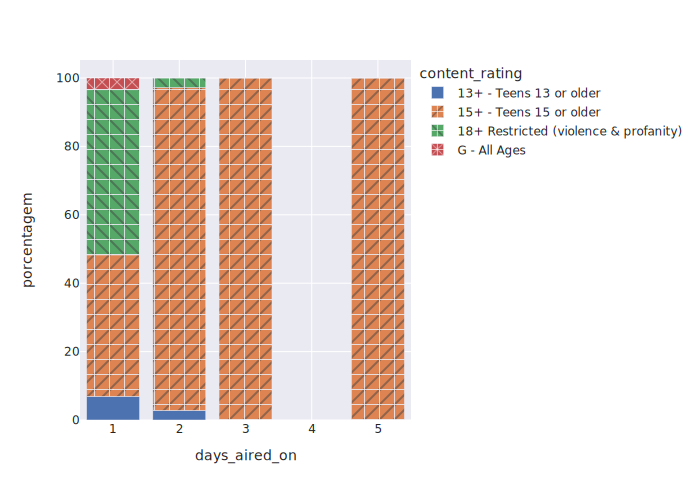

In [35]:
px.bar(days_aired_on_tab, x= "days_aired_on", y=  "porcentagem", color = "content_rating", pattern_shape="content_rating")

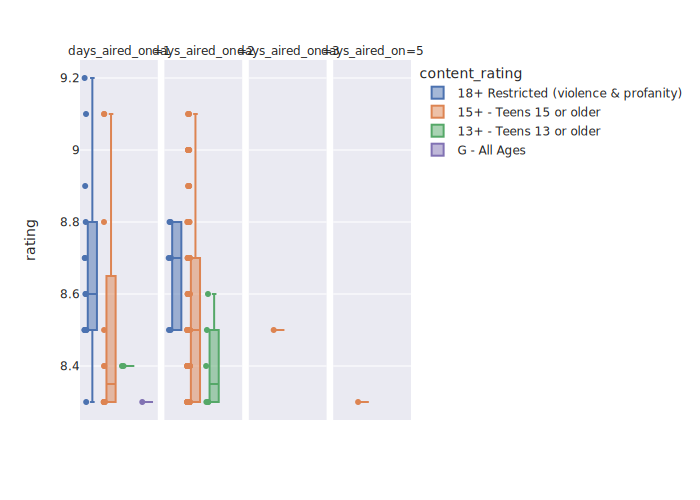

In [36]:
_= px.box(dataNCN2, x = "content_rating", y ="rating", points = "all", facet_col= "days_aired_on", color = "content_rating" )
_.update_xaxes(visible=False, showticklabels=False)

Bingo! Agora temos informações relevantes para ajudar nossos produtores. Podemos ver que como suspeitavamos, além de 2 vezes por semana ser a frequencia mais comum, temos que a restrição de idade mais comum entre essa faixa é de 15+ o que é bom para nosso produtor **Money**. 

Aqui temos uma decisão um tanto dificil para **Hardcore** ele deve escolher o boxplot que possui a maior mediana(2 vezes por semana) ou aquele que tem maiores valores maximos mas uma mediana menor?(1 vez por semana). Ele decide que 1 vez por semana é melhor pois a proporção de kdrmas 18+ que vai ao ar 1 vez por semana é maior do que 2 vezes por semana. Além disso, os maiores scores estão entre os Kdramas que vão ao ar 1 vez por semana e a mediana dos scores destes estão acima do limiar que ele definiu. 


**Money**:
- **Rating**: Pelo menos 8.3 **Definitivo**
- **Restrição de idade:** 15+ **Definitivo**
- **Número de episódios:** 16 episódios
- **Duração do episódio:** 60 minutos
- **N° de Dias:** 2 vezes por semana **Definitivo**
- **Dias**: Sábado e Quarta
- **Genero**: Escolher algo do top 5, Romance ou Drama são boas escolhas.

**Hardcore**: 
- **Rating**: Pelo menos  acima 8.5, preferencialmente 8.7 **Definitivo**
- **Restrição de idade:** 18+ **Definitivo**
- **Número de episódios:** entre 16 e 20 episódios
- **Duração do episódio:** entre 60 e 70 minutos
- **N° de Dias:** 1 vez por semana **Definitivo**
- **Dias**: Sábado 
- **Genero**:


#### Numero de episódios <a class="anchor" id="fourth-second-fifth-second-title"></a>

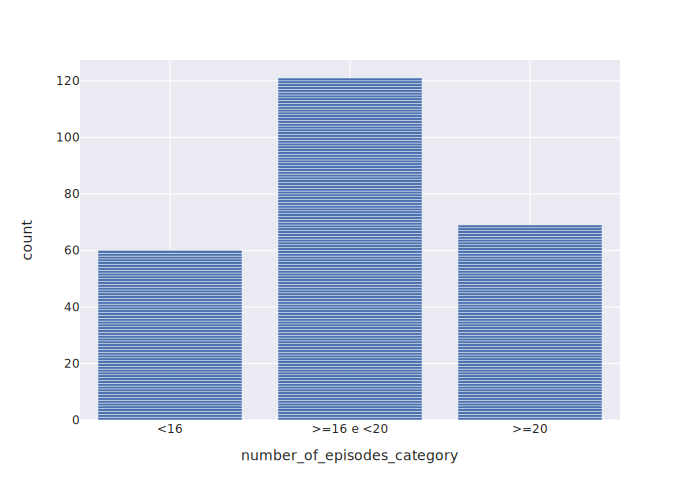

In [37]:
px.bar(dataNCN2, x = "number_of_episodes_category")

In [38]:
number_of_episodes_category_tab = dataNCN2.groupby(["number_of_episodes_category","content_rating"]).size().reset_index()
number_of_episodes_category_tab["porcentagem"] = dataNCN2.groupby(['number_of_episodes_category','content_rating']).size().groupby(level=0).apply(lambda 
        x:100 * x/float(x.sum())).values

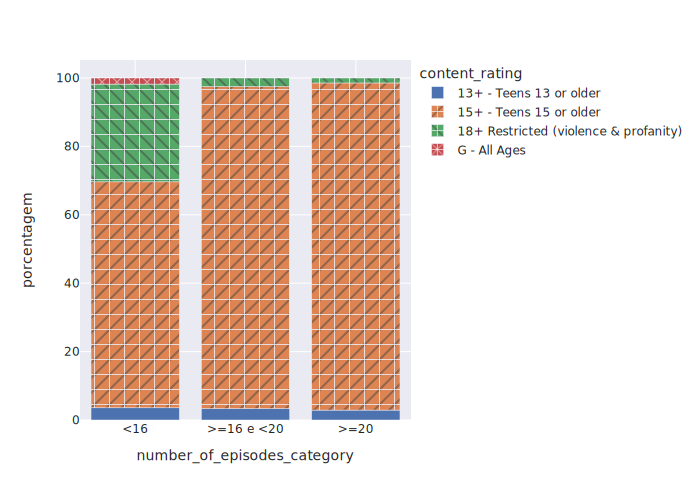

In [39]:
px.bar(number_of_episodes_category_tab, x= "number_of_episodes_category", y=  "porcentagem", color = "content_rating", pattern_shape="content_rating")

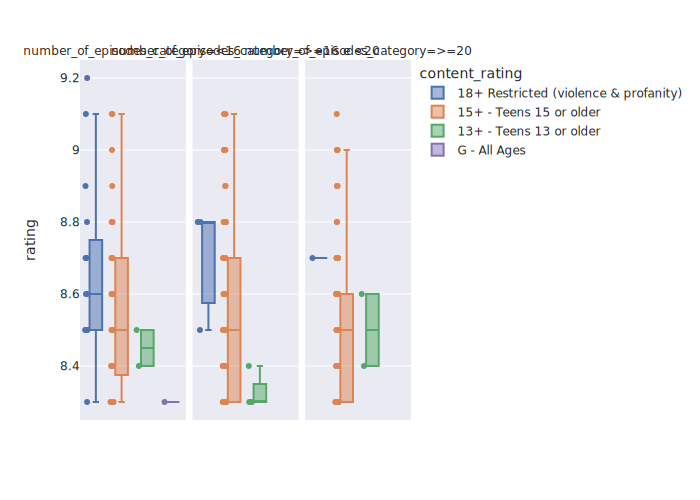

In [40]:
_= px.box(dataNCN2, x = "content_rating", y ="rating", points = "all", facet_col= "number_of_episodes_category", color = "content_rating" )
_.update_xaxes(visible=False, showticklabels=False)

Olhando atentamente vemos que não há muita diferença entre as medianas das séries 15 mais. Portanto, **Money** poderia escolher apenas o mais comum que como vimos no gráfico de frequência acima era entre 16 e 20 que contempla nossa conclusão anterior. Porém, não seria também uma má escola escolher menos de 16 episódios caso ele queira economizar dinheiro.

Para **Hardcore** vamos usar a mesma ideia do item anterior. Apesar da mediana do rating ser maior entre os 16 e 20, há uma grande diferença  no números de kdramas que caem nessa categoria, além de sua proporção em relação ao numero total. Além disso, os números maximos de rating de kdramas com um menos de 16 episódios é maior do que aqueles que tem entre 16 e 20.Finalmente, a mediana é maior do que o limiar que **Hardcore** estipulou(>=8.5). Então ele decide estipular que seu kdrama vai ter até 16 episódios.


**Money**:
- **Rating**: Pelo menos 8.3 **Definitivo**
- **Restrição de idade:** 15+ **Definitivo**
- **Número de episódios:** Até 16 ou entre 16 e 20 episódios **Definitivo**
- **Duração do episódio:** 60 minutos
- **N° de Dias:** 2 vezes por semana **Definitivo**
- **Dias**: Sábado e Quarta
- **Genero**: Escolher algo do top 5, Romance ou Drama são boas escolhas.

**Hardcore**: 
- **Rating**: Pelo menos  acima 8.5, preferencialmente 8.7 **Definitivo**
- **Restrição de idade:** 18+ **Definitivo**
- **Número de episódios:** Até 16 episódios **Definitivo**
- **Duração do episódio:** entre 60 e 70 minutos
- **N° de Dias:** 1 vez por semana **Definitivo**
- **Dias**: Sábado 
- **Genero**:


#### Duração do episódio <a class="anchor" id="fourth-second-fifth-third-title"></a>

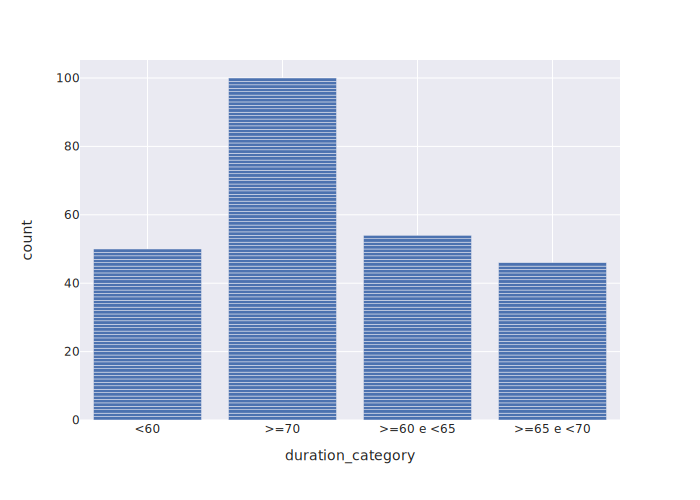

In [41]:
px.bar(dataNCN2, x = "duration_category")

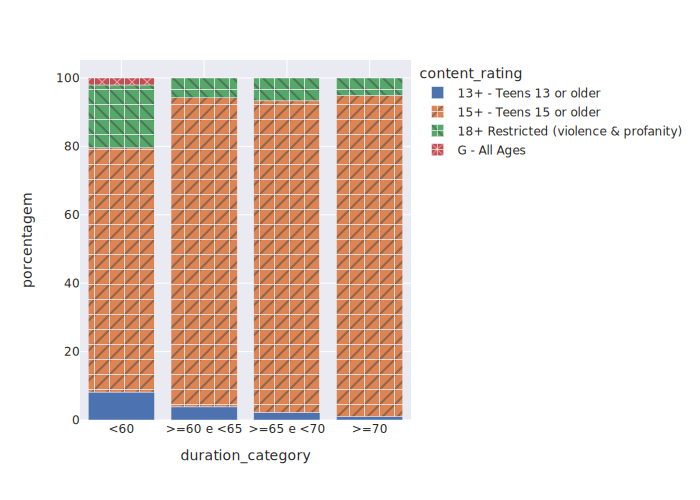

In [42]:
duration_category_tab = dataNCN2.groupby(["duration_category","content_rating"]).size().reset_index()
duration_category_tab["porcentagem"] = dataNCN2.groupby(['duration_category','content_rating']).size().groupby(level=0).apply(lambda 
        x:100 * x/float(x.sum())).values
px.bar(duration_category_tab, x= "duration_category", y=  "porcentagem", color = "content_rating", pattern_shape="content_rating")

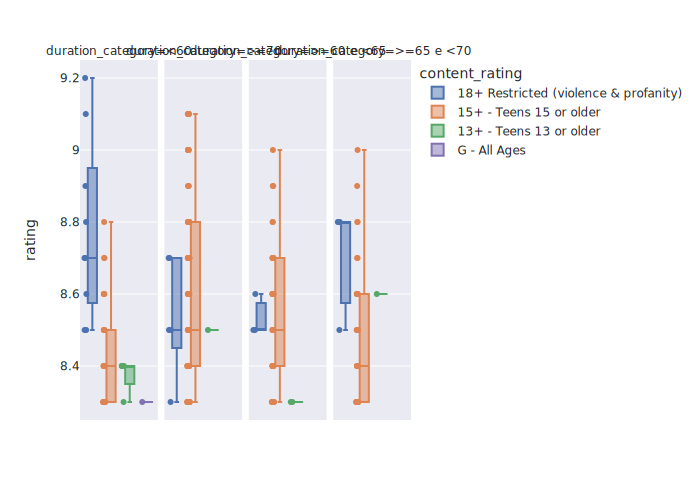

In [43]:
_ = px.box(dataNCN2, x = "content_rating", y ="rating", points = "all", facet_col= "duration_category", color = "content_rating" )
_.update_xaxes(visible=False, showticklabels=False)

Podemos ver que para **Money** temos duas opções: Mais que 70 minutos ou entre 60 e 65 minutos. Ambas tem uma mediana de rating parecida, porém, a categoria de mais de 70 minutos possui um número absoluto de kdramas. Como anteriormente, ele pode escolher ou o mais comum( mais que 70 minutos) ou o que pode economizar mais dinheiro(entre 60 e 65 minutos).

Já para **Hardcore** vamos seguir a mesma lógica, mas dessa vez é uma escolha mais segura pois as contagens absolutas das duas categorias que vamos comparar são parecidas. Vemos que para a duração de até 60 minutos  a mediana é menor do que para entre 65 e 70 minutos. Porém, kdramas 18+ de até 60 minutos, estão mais representados no kdramas do que em comparação dos kdramas de 65 a 70 minutos. Além disso, assim como antes, o número maximo de rating é maior nos kdramas de até 60 minutos, o que torna-o atrativo para **Hardcore**.

Assim, ficamos com:

**Money**:
- **Rating**: Pelo menos 8.3 **Definitivo**
- **Restrição de idade:** 15+ **Definitivo**
- **Número de episódios:** Até 16 ou entre 16 e 20 episódios **Definitivo**
- **Duração do episódio:** Entre 60 e 65 minutos ou mais que 70 minutos  **Definitivo**
- **N° de Dias:** 2 vezes por semana **Definitivo**
- **Dias**: Sábado e Quarta
- **Genero**: Escolher algo do top 5, Romance ou Drama são boas escolhas.

**Hardcore**: 
- **Rating**: Pelo menos  acima 8.5, preferencialmente 8.7 **Definitivo**
- **Restrição de idade:** 18+ **Definitivo**
- **Número de episódios:** Até 16 episódios **Definitivo**
- **Duração do episódio:** Até 60 minutos **Definitivo**
- **N° de Dias:** 1 vez por semana **Definitivo**
- **Dias**: Sábado 
- **Genero**:


Por último, vamos filtrar por esses fatores que determinamos para definir os dias e os possíveis genêros mais indicados para cada um dos casos

In [44]:

MoneydataNCN2 = dataNCN2[ (dataNCN2.rating >= 8.3) & 
                         (dataNCN2.content_rating == "15+ - Teens 15 or older") & 
                         ((dataNCN2.number_of_episodes_category == "<16") | (dataNCN2.number_of_episodes_category == ">=16 e <20")) & 
                         ((dataNCN2.duration_category == ">=70"  )| (dataNCN2.duration_category == ">=60 e <65")) &
                          (dataNCN2.days_aired_on == 2) 
                        ].copy()
MoneydataNCN2 = MoneydataNCN2.set_index("rank")
MoneydataNCN2.head(5)

,name,aired_date,year_of_release,original_network,aired_on,number_of_episodes,duration,content_rating,rating,synopsis,genre,tags,director,screenwriter,cast,production_companies,days_aired_on,number_of_episodes_category,duration_category
rank,,,,,,,,,,,,,,,,,,,
#2,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,70,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,2,>=16 e <20,>=70
#5,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,77,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,2,>=16 e <20,>=70
#8,Prison Playbook,"Nov 22, 2017 - Jan 18, 2018",2017,"Netflix, tvN","Wednesday, Thursday",16,92,15+ - Teens 15 or older,9.1,"Kim Je Hyuk, a famous baseball player, is arre...","Comedy, Crime, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",Shin Won Ho,"Jung Bo Hoon, Lee Woo Jung","Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im ...",tvN,2,>=16 e <20,>=70
#10,Extraordinary Attorney Woo,"Jun 29, 2022 - Aug 18, 2022",2022,"ENA, Netflix","Wednesday, Thursday",16,77,15+ - Teens 15 or older,9.0,"Diagnosed with autism spectrum disorder, 27-ye...","Law, Romance, Life, Drama","Autistic Female Lead, Autism, Attorney Female...",Yoo In Shik,Moon Ji Won,"Park Eun Bin, Kang Tae Oh, Kang Ki Young, Jeon...","AStory, KT Studio Genie, Nangman Crew",2,>=16 e <20,>=70
#12,Mother,"Jan 24, 2018 - Mar 15, 2018",2018,tvN,"Wednesday, Thursday",16,63,15+ - Teens 15 or older,9.0,"Realizing one of her students is being abused,...","Thriller, Mystery, Psychological, Melodrama","Mother-Daughter Relationship, Independent Fema...","Kim Chul Gyu, Yoon Hyun Gi",Jung Seo Kyung,"Lee Bo Young, Heo Yool, Lee Hye Young, Go Sung...",The Unicorn,2,>=16 e <20,>=60 e <65


In [45]:
 HardcoredataNCN2 = dataNCN2[ (dataNCN2.rating >= 8.5) & 
                         (dataNCN2.content_rating == "18+ Restricted (violence & profanity)") & 
                         (dataNCN2.number_of_episodes <= 16) & 
                         (dataNCN2.duration <=60) &
                          (dataNCN2.days_aired_on == 1) 
                        ].copy()
HardcoredataNCN2 = HardcoredataNCN2.set_index("rank")
HardcoredataNCN2.head(5)

,name,aired_date,year_of_release,original_network,aired_on,number_of_episodes,duration,content_rating,rating,synopsis,genre,tags,director,screenwriter,cast,production_companies,days_aired_on,number_of_episodes_category,duration_category
rank,,,,,,,,,,,,,,,,,,,
#1,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",1,<16,<60
#7,Weak Hero Class 1,"Nov 18, 2022",2022,Wavve,Friday,8,40,18+ Restricted (violence & profanity),9.1,Yeon Shi Eun is a model student who ranks at t...,"Action, Youth, Drama\r","Bromance, Smart Male Lead, Violence, School Bu...",You Su Min,Jun Hee Han,"Park Ji Hoon, Choi Hyun Wook, Hong Kyung, Kim ...",PlayList Global,1,<16,<60
#20,Kingdom: Season 2,"Mar 13, 2020",2020,Netflix,Friday,6,45,18+ Restricted (violence & profanity),8.9,"Following the events in season one, waves of t...","Thriller, Historical, Horror, Supernatural","Zombies, Corruption, Strong Male Lead, Gore, S...","Kim Sung Hoon, Park In Je",Kim Eun Hee,"Joo Ji Hoon, Bae Doo Na, Kim Sung Gyu, Ryu Seu...",AStory,1,<16,<60
#30,Kingdom,"Jan 25, 2019",2019,Netflix,Friday,6,51,18+ Restricted (violence & profanity),8.8,No sooner does the Joseon King succumb to smal...,"Thriller, Historical, Horror, Political","Joseon Dynasty, Adapted From A Webtoon, Power ...",Kim Sung Hoon,Kim Eun Hee,"Joo Ji Hoon, Ryu Seung Ryong, Bae Doo Na, Kim ...",AStory,1,<16,<60
#55,Sweet Home,"Dec 18, 2020",2020,Netflix,Friday,10,52,18+ Restricted (violence & profanity),8.7,Following the death of his family in an accide...,"Horror, Drama, Sci-Fi, Supernatural","Monsters, Gore, Survival, Character Developmen...",Lee Eung Bok,Kim Hyung Min,"Song Kang, Lee Jin Wook, Lee Si Young, Lee Do ...","Studio Dragon, Studio N",1,<16,<60


#### Dias <a class="anchor" id="fourth-second-fifth-fourth-title"></a>

##### Money <a class="anchor" id="fourth-second-fifth-fourth-first-title"></a>

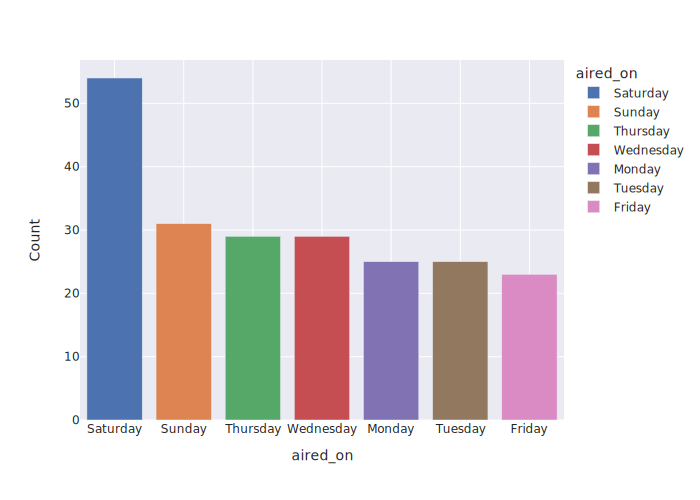

In [46]:
days_count_Money= countSM(MoneydataNCN2, "aired_on")
px.bar(days_count_Money, x = "aired_on", y = "Count", color = "aired_on")

Diferente do que vimos anteriormente, agora temos que os melhores dias são sábado e domingo! Vamos atualizar os dados de **Money**.

**Money**:
- **Rating**: Pelo menos 8.3 **Definitivo**
- **Restrição de idade:** 15+ **Definitivo**
- **Número de episódios:** Até 16 ou entre 16 e 20 episódios **Definitivo**
- **Duração do episódio:** Entre 60 e 65 minutos ou mais que 70 minutos  **Definitivo**
- **N° de Dias:** 2 vezes por semana **Definitivo**
- **Dias**: Sábado e Domingo **Definitivo**
- **Genero**: Escolher algo do top 5, Romance ou Drama são boas escolhas.


##### Hardcore  <a class="anchor" id="fourth-second-fifth-fourth-second-title"></a>

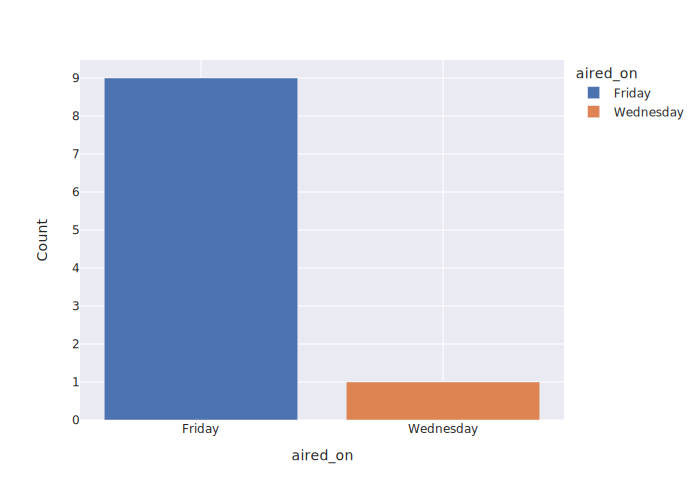

In [47]:
days_count_Hard = countSM(HardcoredataNCN2, "aired_on")
px.bar(days_count_Hard, x = "aired_on", y = "Count", color = "aired_on")

Para **Hardcore** o resultado é radicalmente diferente, provavelmente porque há poucos kdramas com as condições que adotamos. Assim, incontestavelmente vamos adotar sexta.

**Hardcore**: 
- **Rating**: Pelo menos  acima 8.5, preferencialmente 8.7 **Definitivo**
- **Restrição de idade:** 18+ **Definitivo**
- **Número de episódios:** Até 16 episódios **Definitivo**
- **Duração do episódio:** Até 60 minutos **Definitivo**
- **N° de Dias:** 1 vez por semana **Definitivo**
- **Dias**: Sexta **Definitivo**
- **Genero**: 

#### Genero  <a class="anchor" id="fourth-second-fifth-fifth-title"></a>

##### Money  <a class="anchor" id="fourth-second-fifth-fifth-first-title"></a>

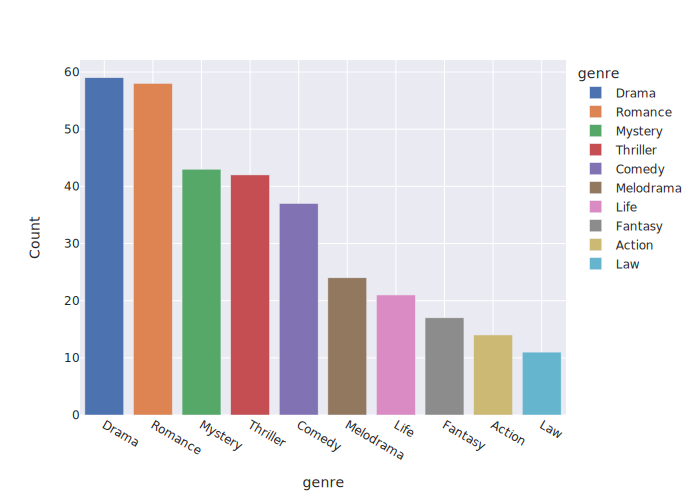

In [48]:
genre_count_Money = countSM(MoneydataNCN2, "genre")
px.bar(genre_count_Money.iloc[0:10,:], x = "genre", y = "Count", color = "genre")

Em relação aos generos, apesar da ordem ter mudado um  pouco, vemos que a tendencia é a mesma, portanto, vamos manter.

**Money**:
- **Rating**: Pelo menos 8.3 **Definitivo**
- **Restrição de idade:** 15+ **Definitivo**
- **Número de episódios:** Até 16 ou entre 16 e 20 episódios **Definitivo**
- **Duração do episódio:** Entre 60 e 65 minutos ou mais que 70 minutos  **Definitivo**
- **N° de Dias:** 2 vezes por semana **Definitivo**
- **Dias**: Sábado e Domingo **Definitivo**
- **Genero**: Escolher algo do top 5 ( Drama, Romance, Mistério, Suspense ou Comédia). **Definitivo**


##### Hardcore <a class="anchor" id="fourth-second-fifth-fifth-second-title"></a>

In [ ]:
genre_count_Hard = countSM(HardcoredataNCN2, "genre")
px.bar(genre_count_Hard.iloc[0:10,:], x = "genre", y = "Count", color = "genre")

Para **Hardcore** os genêros principais são mais faceis de escolher: Drama e suspense são boas escolhas, mas já os outros é dificil dizer devido ao baixo número de kdramas.

**Hardcore**: 
- **Rating**: Pelo menos  acima 8.5, preferencialmente 8.7 **Definitivo**
- **Restrição de idade:** 18+ **Definitivo**
- **Número de episódios:** Até 16 episódios **Definitivo**
- **Duração do episódio:** Até 60 minutos **Definitivo**
- **N° de Dias:** 1 vez por semana **Definitivo**
- **Dias**: Sexta **Definitivo**
- **Genero**: Drama e suspense são ótimas escolhas **Definitivo**

# Conclusão <a class="anchor" id="fifth-title"></a>
 
## Sobre o dataset <a class="anchor" id="fifth-first-title"></a>

Considerando **maioria = >50%.**

Vamos destacar as **caracteristicas mais comums** dos **top 250 kdramas**:

- O rating mediano  é de 8.5
- A restrição de idade mais comum é 15+
- A maioria desses kdramas possui entre 16 e 20 episódios
- A maior parte desses kdramas possui uma duração de episódio de 60 a 70 minutos
- A maioria desses kdramas vai ao ar 2 vezes por semana.
- Os dias mais comuns para que os kdramas vão ao ar é de Sábado e Quarta(Não combinados).
- Os top 5 generos mais comuns entre os kdramas são: Romance, Drama, Comédia, Mistério e Suspense ( Do mais comum para o menos)

Além disso, vimos que aparentemente nenhuma dessas variavies aparenta ter efeito no rating com exceção da restrição de idade. Vimos que conforme a restrição de idade diminuio rating parece subir (por exemplo 18+ tem um rating mediano maior do que 15+) , apesar da grande diferença de N.


## Sobre nossos produtores <a class="anchor" id="fifth-second-title"></a>

### Money <a class="anchor" id="fifth-second-first-title"></a>

Vimos que para atingir o seu objetivo de alcançar um kdrama que venda bem money pode utilizar  um kdrama de referencia com as seguintes caracteristicas:

- **Rating**: Pelo menos 8.3 
- **Restrição de idade:** 15+ 
- **Número de episódios:** Até 16 ou entre 16 e 20 episódios
- **Duração do episódio:** Entre 60 e 65 minutos ou mais que 70 minutos  
- **N° de Dias:** 2 vezes por semana 
- **Dias**: Sábado e Domingo 
- **Genero**: Escolher algo do top 5 ( Drama, Romance, Mistério, Suspense ou Comédia). 

Alguns exemplos de kdramas com essas características: **Flower of Evil(#2),  My Mister(#5) ,  Prison Playbook(#8)**

### Hardcore <a class="anchor" id="fifth-second-second-title"></a>


Partindo do principio que um kdrama 18+ seria o mais recomendado, diante da maior liberdade de conteúdo, e a possivel correlação entre o rating e a restrição de idade.

Diante disso vimos que as melhores características para que ele alcance seu objetivo de um dos melhores kdramas já feitos foram:

- **Rating**: Pelo menos  acima 8.5, preferencialmente 8.7
- **Restrição de idade:** 18+ 
- **Número de episódios:** Até 16 episódios 
- **Duração do episódio:** Até 60 minutos 
- **N° de Dias:** 1 vez por semana 
- **Dias**: Sexta 
- **Genero**: Drama e suspense são ótimas escolhas 

Alguns exemplos de kdramas com essas características: **Move to Heaven(#1), Weak Hero Class 1 (#7), Kingdom: Season 2 (#20)**